In [1]:
# imports

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

# Suppress warnings; reference from "https://docs.python.org/3/library/warnings.html"
warnings.filterwarnings("ignore")

### _Loading and exploring the Iris dataset_

In [2]:
# load the iris dataset

iris = load_iris()

In [3]:
# description of the iris dataset

description = iris["DESCR"]
print(description)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# features of the dataset

features = iris["feature_names"]
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# the class labels of the target

labels = iris["target_names"]
print(labels)

['setosa' 'versicolor' 'virginica']


In [6]:
# divide the data into a feture matrix and target array

X = iris["data"]
y = iris["target"]

In [7]:
# There are 150 records in total each with 4 features

X.shape 

(150, 4)

In [8]:
# the target array has 0, 1 & 2 as encoded class labels

np.unique(y)

array([0, 1, 2])

In [9]:
# print the distribution of classes

target, count = np.unique(y, return_counts = True)
for i in range(len(target)):
    print(f"There are {count[i]} samples of the class {labels[i]}")

There are 50 samples of the class setosa
There are 50 samples of the class versicolor
There are 50 samples of the class virginica


### _Data Preporcessing_

In [10]:
# restructure the data to form a dataframe for data pre-processing

dataset = np.hstack((X, y.reshape(-1,1)))

# convert data into dataframe
df = pd.DataFrame(dataset, columns = features + ["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
# print the data-types of each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [12]:
# convert the target variable into "int" type

df["target"] = df["target"].astype(np.int8)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# describe the statistics of individual columns in the data

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# The data has no null values and has an equal distribution of each class in the dataset.

print(df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [15]:
# normalize the data for better clustering performance

df = (df - df.mean()) / df.std()

In [16]:
# normalized dataset

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,-1.220656
1,-1.139200,-0.131539,-1.335752,-1.311052,-1.220656
2,-1.380727,0.327318,-1.392399,-1.311052,-1.220656
3,-1.501490,0.097889,-1.279104,-1.311052,-1.220656
4,-1.018437,1.245030,-1.335752,-1.311052,-1.220656


### _K-means clustering_

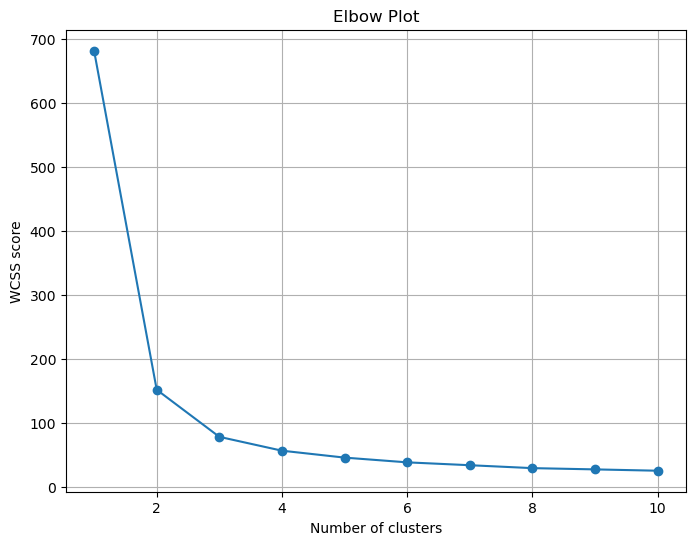

In [17]:
# Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans


wcss = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state = 78)
    kmeans.fit(X)
    
    # intertia_ attribute represents the WCSS value
    wcss.append(kmeans.inertia_)

# Plot WCSS over the k-values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS score')
plt.grid()
plt.show()

In [18]:
# Apply K-means clustering with 3 clusters, for the best classification
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# labels_ attribute stores the cluster assignment of each data ponint
kmeans_labels = kmeans.labels_

In [19]:
# 0,1,2 represent the clusters

kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
# co-ordinates of the cluster centroids in 4D space

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

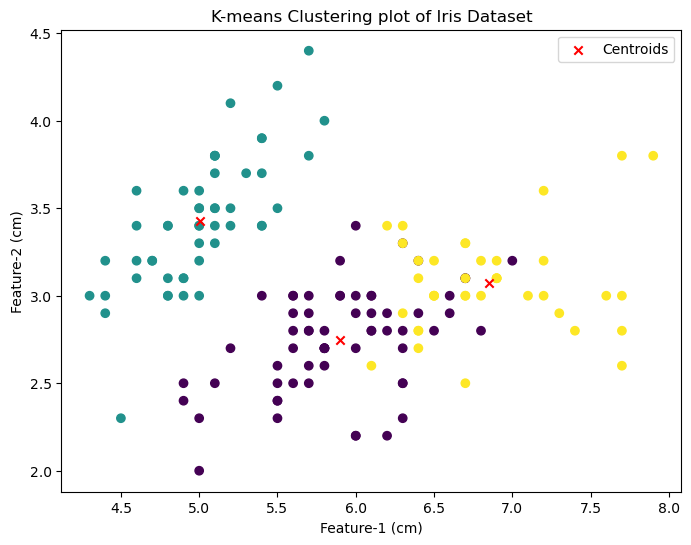

In [21]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the data points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')

plt.title('K-means Clustering plot of Iris Dataset')
plt.xlabel('Feature-1 (cm)')
plt.ylabel('Feature-2 (cm)')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X, kmeans_labels)
print("K-means Silhouette Score with 3 clusters:", silhouette_avg.round(3))

K-means Silhouette Score with 3 clusters: 0.553


### _Hierarchical Clustering - Agglomerative_ 

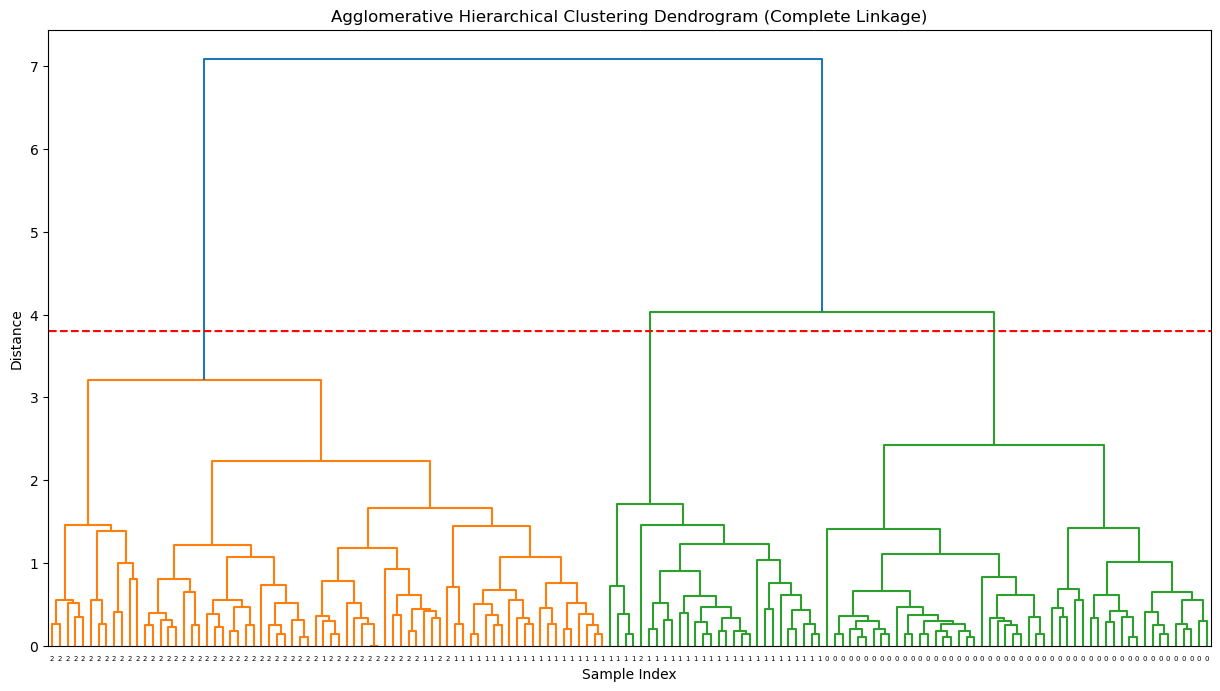

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# obtain the clustering labels
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# Compute the linkage matrix using complete linkage
Z = linkage(X, method='complete', metric = "euclidean")

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=y)
plt.plot(range(1,3001), [3.8]*3000, "r--")
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.xticks(rotation = 0)
plt.ylabel('Distance')
plt.show()


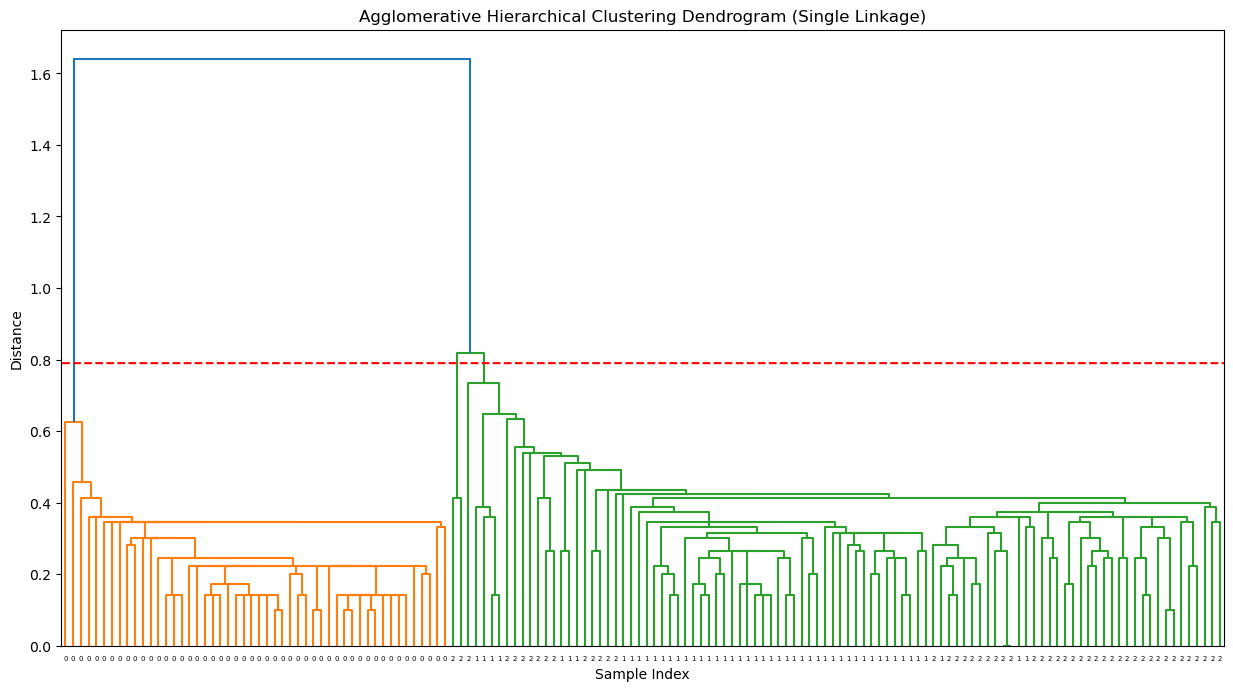

In [24]:
# Compute the linkage matrix using single linkage
Z = linkage(X, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=y)
plt.plot(range(1,3001), [0.79]*3000, "r--")
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.xticks(rotation = 0)
plt.ylabel('Distance')
plt.show()


### _Density-Based Spatial Clustering of Applications with Noise(DBSCAN)_

In [25]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X)

# Number of clusters in labels, ignoring noise if present, indicated by -1
if -1 in dbscan_labels:
    clusters = len(set(dbscan_labels)) - 1
else:
    clusters = len(set(dbscan_labels))

noise = list(dbscan_labels).count(-1)

print('Estimated number of clusters: %d' % clusters)
print('Estimated number of noise points: %d' % noise)

Estimated number of clusters: 2
Estimated number of noise points: 17


In [27]:
# Find optimum value for hyperparameters of DBSCAN through grid-search algorithm
eps_values = np.linspace(0.1, 2.0, 40)
min_samples_values = range(2, 11)

best_silhouette_score = -1
best_eps = None
best_min_samples = None

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        
        # Fit DBSCAN method
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        
        
        labels = dbscan.labels_        
        
        if len(set(labels)) > 1:  
            
            silhouette_avg = silhouette_score(X, labels)
            
            # Update best parameters if silhouette score improves
            if silhouette_avg > best_silhouette_score:
                
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                

print("Best Silhouette Score:", best_silhouette_score.round(3))
print("Best Epsilon value:", best_eps.round(3))
print("Best Minimum Points:", best_min_samples)

Best Silhouette Score: 0.687
Best Epsilon value: 0.831
Best Minimum Points: 2


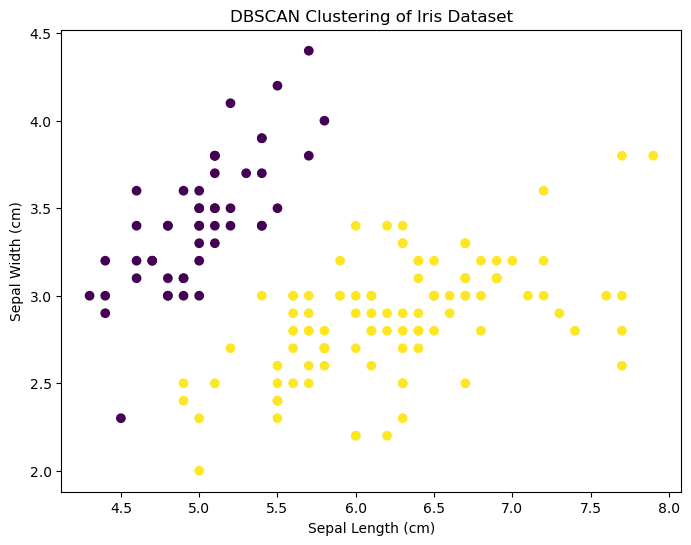

In [28]:
# Apply DBSCANusing the optimum parameters to find, 
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)

# Extract cluster labels
cluster_labels = dbscan.labels_


plt.figure(figsize=(8, 6))

# Plot points colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()

### _K-means vs Hierarchical vs DBSCAN_

In [29]:
# To compare the performance of the 3 algorithms we can use the silhouette score of each algorithm and rank them accordingly

# Evaluate clustering performance
kmeans_silhouette = silhouette_score(X, kmeans_labels)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

In [30]:
print("Silhouette score using k-means with k = 3 is ", kmeans_silhouette.round(3))
print("Silhouette score using Agglometric Hierarchical Clustering with complete linkage is ", hierarchical_silhouette.round(3))
print("Silhouette score using DBSCAN with epsilon = 0.83 & min_pts = 2 is ", dbscan_silhouette.round(3))

Silhouette score using k-means with k = 3 is  0.553
Silhouette score using Agglometric Hierarchical Clustering with complete linkage is  0.554
Silhouette score using DBSCAN with epsilon = 0.83 & min_pts = 2 is  0.486


In [31]:
# Based on the scores obtained we can say that K-means performes well on the Iris data amongst the given algorithms